**Tâche 7 : Trouver les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.**

Pour cet exercice, nous allons tout d'abord trouver l'angle $ 2\theta$ pour lequel nous observons un pic, l'intensité du pic, la famille de plans (hkl) ainsi que la distance entre les plans à l'aide de la fonction get_pattern ainsi que les attributs de la class Diffraction Pattern. Ensuite, nous allons vérifier, de manière mathématique, la distance entre les plans ainsi que la valeur de $2\theta$. Ensuite, nous allons anlyser l'intensité des pics. Enfin, nous allons construire une fonction pour vérifier que, pour toutes les valeurs de hkl qui donnent un pic, nous trouvons bien une valeur non nulle de S_hkl, dont l'intensité est proportionnelle, et qu'il n'y aura donc pas d'extinctions pour ces hkl. 

In [35]:
# Import 
import numpy as np
from pymatgen import Lattice, Structure, Molecule
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import * 
from jupyter_jsmol.pymatgen import quick_view
from math import *
import pandas as pd
import tabulate

In [36]:
# Accéder aux données liées au cristal NaHF2 via l'API
with MPRester("gTFWb3O68X2aDOkOAmv") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-27837")

In [37]:
# Nous prenons le calculateur pour CuKa1 car elle donne une longueur d'onde la plus proche de 1.54056, très proche de 1.5406.  
xrdcal = XRDCalculator('CuKa1')
patt = xrdcal.get_pattern(structure)

**Trouvons les paramètres liés aux différents pics du diffractogramme à l'aide des attributs de la classe Diffraction Pattern**

In [38]:
print("Premier pic pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å \n")
print("Angle 2θ [°] :", patt.x[0])
print("Intensité du premier pic [%] :", patt.y[0])
print("Indices hkl associés :", patt.hkls[0])
print("Distance entre les plans hkl [Å] :", patt.d_hkls[0])

Premier pic pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å 

Angle 2θ [°] : 19.189494168026666
Intensité du premier pic [%] : 27.861847218495676
Indices hkl associés : [{'hkl': (1, 1, 1), 'multiplicity': 2}]
Distance entre les plans hkl [Å] : 4.6213560643213185


In [39]:
print("Deuxième pic pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å \n")
print("Angle 2θ [°] :", patt.x[1])
print("Intensité du premier pic [%] :", patt.y[1])
print("Indices hkl associés :", patt.hkls[1])
print("Distance entre les plans hkl [Å] :", patt.d_hkls[1])

Deuxième pic pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å 

Angle 2θ [°] : 29.965245556128803
Intensité du premier pic [%] : 8.317511802084969
Indices hkl associés : [{'hkl': (1, 0, 0), 'multiplicity': 6}]
Distance entre les plans hkl [Å] : 2.979506


In [40]:
print("Troisième pic pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å \n")
print("Angle 2θ [°] :", patt.x[2])
print("Intensité du premier pic [%] :", patt.y[2])
print("Indices hkl associés :", patt.hkls[2])
print("Distance entre les plans hkl [Å] :", patt.d_hkls[2])

Troisième pic pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å 

Angle 2θ [°] : 32.02601712626506
Intensité du premier pic [%] : 100.0
Indices hkl associés : [{'hkl': (1, 1, 0), 'multiplicity': 6}]
Distance entre les plans hkl [Å] : 2.7923305233075024


Graphe de l'intensité des 3 premiers pics du diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å 



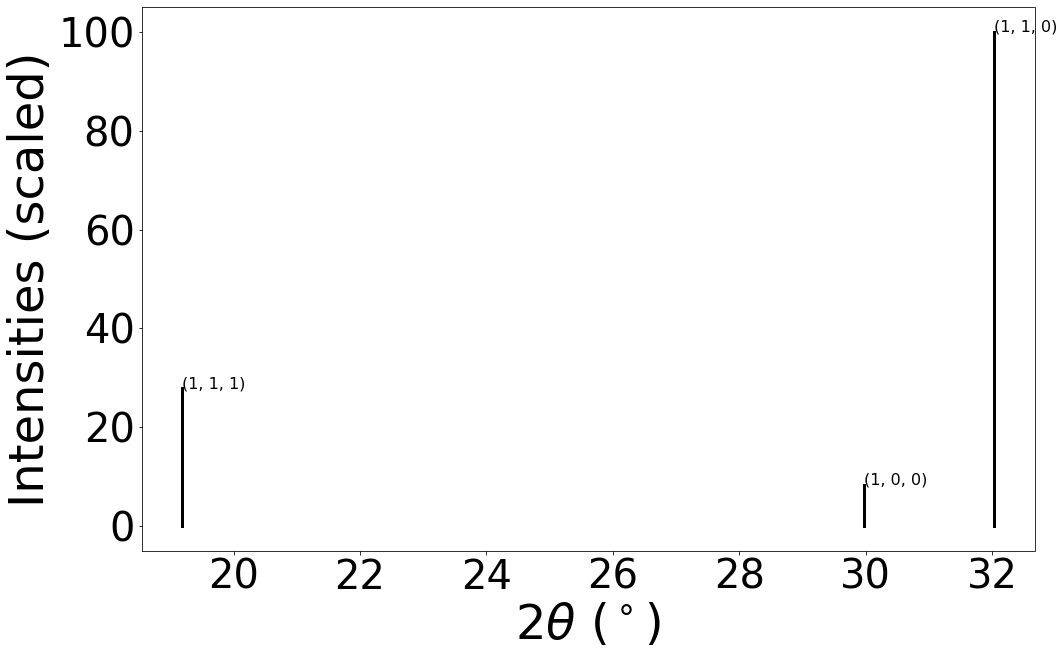

In [41]:
print("Graphe de l'intensité des 3 premiers pics du diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å \n")
xrdcal.show_plot(structure, two_theta_range=(0, 35))

**Vérification des valeurs de la distance entre les plans (hkl) et de $2\theta$**

La distance entre les plans de la famille (hkl) peut s'obtenir par la formule suivante : $d_{hkl} = 2\pi / |v|$ où $v = ha^* + kb^* + lc^*$ où a^*, b^* et c^* sont les vecteurs de base du réseau réciproque. 

Ensuite, la valeur de $2\theta$ pour lequel il y a un pic de diffraction peut s'obtenir par la loi de Bragg : $2 d_{hkl} sin(\theta) = n\lambda$ où $\lambda = 1.54056 Å$ et $n = 1$. On prend $n = 1$ pour avoir les pics d'intensité la plus élevée. 

In [42]:
# Vecteurs de base du réseau direct de la maille primitive
lattice = structure.lattice
matrice = lattice.matrix

# Vecteurs de base du réseau réciproque (utilisé avec un facteur 2pi)
lattice_reci = structure.lattice.reciprocal_lattice
matrice_reci = lattice_reci.matrix

In [43]:
# Les 3 premiers pics sont :
h = [1, 1, 1]
k = [1, 0, 1]
l = [1, 0, 0]

# Initialisation 
d_hkl = [0,0,0]
deux_theta = [0,0,0]
pic = [1,2,3]
plan = [0,0,0]
i=0

for i in range(3):
    v_norm = np.linalg.norm(h[i]*matrice_reci[0] + k[i]*matrice_reci[1] + l[i]*matrice_reci[2])
    d_hkl[i] = 2* pi / v_norm
    deux_theta[i] = 2* asin(1.54056/(2*d_hkl[i]))* (180/pi)
    plan[i] = (h[i], k[i], l[i])
  
dist = [patt.d_hkls[0], patt.d_hkls[1], patt.d_hkls[2]]
df1 = pd.DataFrame({'Pic': pic,
                    'Plans' : plan,
                    'd_hkl par les attributs': dist,
                    'd_hkl par calcul': d_hkl
                   })
df1.head() 

,Pic,Plans,d_hkl par les attributs,d_hkl par calcul
0,1,"(1, 1, 1)",4.621356,4.621356
1,2,"(1, 0, 0)",2.979506,2.979505
2,3,"(1, 1, 0)",2.792331,2.792331


In [44]:
angle = [patt.x[0], patt.x[1], patt.x[2]]
df = pd.DataFrame({'Pic': pic,
                    'Plans' : plan,
                    '$2\theta$ par les attributs': angle,
                    '$2\theta$ par calcul': deux_theta
                   })
df.head() 

,Pic,Plans,$2\theta$ par les attributs,$2\theta$ par calcul
0,1,"(1, 1, 1)",19.189494,19.189494
1,2,"(1, 0, 0)",29.965246,29.965253
2,3,"(1, 1, 0)",32.026017,32.026017


**Analysons l'intensité des pics**

Graphe de l'intensité des pics du diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å 



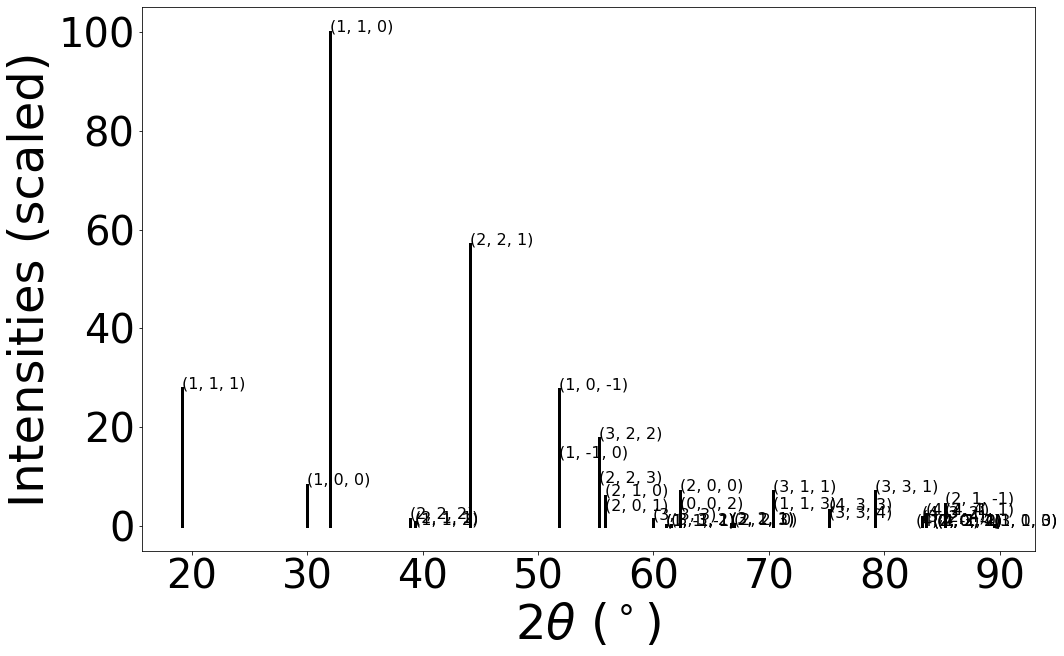

In [45]:
print("Graphe de l'intensité des pics du diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54056 Å \n")
xrdcal.show_plot(structure, two_theta_range=(0, 90))

Tout d'abord, comme vu dans la théorie, l'intensité des pics diminue lorsque l'angle $2\theta$ augmente. 
Cependant, il y a quelques exceptions qui peuvent être expliquées par la multiplicité des indices hkl. Par exemple, pour (110), nous avons la "contribution" de (110), (101) et (011) alors que pour le (111), nous n'avons qu'une seule possibilité. 

**Vérification de l'intensité non nulle pour les hkl qui correspondent au pic de diffractogramme**

On peut également justifier une intensité non nulle des pics grâce au facteur de structure de la maille dont l'intensité est proportionnelle : $I ∝ |S_K|² $ avec $$S_K = \sum_{j=1}^{N} f_j(K)e^{iKr_j}$$ où $f_j(K)$ est le facteur de forme atomique, $N$ le nombre d'atomes dans la maille (primitive ici), $r_j$ la position de l'atome $j$ et $K$ le vecteur du réseau réciproque. 

Si S = 0, c'est que pour le hkl choisi, il y aura une extinction, vu que I sera nulle. 

Avec la fonction ci-dessous, nous obtenons S et nous pouvons donc bien vérifier que l'intensité aux pics issus du diffractogramme est non nulle, en mettant les hkl souhaités comme paramètres de la fonction S.

In [46]:
def S(h,k,l):
    # Atomes dans la maille primitive : 
    Na = (0,0,0)
    H = (1/2, 1/2, 1/2)
    F1 = (0.4172, 0.4172, 0.4172)
    F2 = (0.5828, 0.5828, 0.5828)

    # Vecteur k = v
    v = h*matrice_reci[0] + k*matrice_reci[1] + l*matrice_reci[2]

    # Vecteurs r pour chacun des atomes
    r_Na = np.dot(matrice, Na)
    r_H = np.dot(matrice, H)
    r_F1 = np.dot(matrice, F1)
    r_F2 = np.dot(matrice, F2)

    # Calculons S_hkl
    S=0
    f = 1 # c'est le facteur de forme
    S_Na = f* ( cos(np.dot(v, r_Na)) + sin(np.dot(v, r_Na))*1j)
    S_H = f* ( cos(np.dot(v, r_H)) + sin(np.dot(v, r_H))*1j)
    S_F1 = f* ( cos(np.dot(v, r_F1)) + sin(np.dot(v, r_F1))*1j)
    S_F2 = f* ( cos(np.dot(v, r_F2)) + sin(np.dot(v, r_F2))*1j)
    S = S_Na + S_H + S_F1 + S_F2
    print(S, "\n")

In [47]:
# Testons la valeur du S : ici pour hkl = 1 1 1 par exemple
S(1,1,1)

(-1.7313079880674747+0.380978176426639j) 

